# Análisis de las entradas de leche a una fábrica de queso mediante `Python`

In [1]:
import os, sys
import os, sys
import pandas as pd
import datetime
import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import locale # para fechas y nombres de fechas en español
from scipy.stats import norm

In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Ruta a tu Mi Unidad en Google Drive
google_drive_path = '/content/drive/MyDrive/Colab Notebooks/'

try:
    os.chdir(google_drive_path)
    print(f"Directorio de trabajo cambiado a: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: La ruta '{google_drive_path}' no se encontró. Asegúrate de que Google Drive esté montado correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cambiar el directorio: {e}")

Directorio de trabajo cambiado a: /content/drive/MyDrive/Colab Notebooks


In [5]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

Antes de cargar el fichero de datos `rutas_leche.csv`, verificamos que existe y hay acceso:

In [6]:
os.path.exists("master-queseria/datos/rutas_leche.csv")

True

In [47]:
# Lectura de datos y creacion de index
df_rutas_leche = pd.read_csv("master-queseria/datos/rutas_leche.csv", decimal = ",", sep=';')
df_rutas_leche['fecha_index']= pd.DatetimeIndex(df_rutas_leche.fecha).normalize()
df_rutas_leche.set_index('fecha_index',inplace=True)
df_rutas_leche.sort_index(inplace=True)

In [ ]:
df_rutas_leche.dtypes

,0
codruta,int64
peso,int64
tipoleche,object
fecha,object
acidez,float64
caseina,float64
densidad,float64
est,float64
lactosa,float64
mg,float64


In [46]:
# Limpieza de la columna 'tipoleche' y conversion a category para evitar errores
df_rutas_leche['tipoleche'] = df_rutas_leche['tipoleche'].str.strip()
df_rutas_leche['tipoleche'] = df_rutas_leche['tipoleche'].fillna('DESCONOCIDO')
df_rutas_leche['tipoleche'] = df_rutas_leche['tipoleche'].astype('category')

In [ ]:
# Limpieza de la columna 'est'
df_rutas_leche['est'] = pd.to_numeric(
    errors='coerce'
)

In [32]:
df_rutas_leche.head()

,codruta,peso,tipoleche,fecha,acidez,caseina,densidad,est,lactosa,mg,ph,prot,temp
fecha_index,,,,,,,,,,,,,
2010-12-16,1,25000,CABRA,16/12/2010,14.0,NaN,1.032,15.05,4.52,6.06,NaN,3.92,3.0
2010-12-18,1,25720,CABRA,18/12/2010,13.0,NaN,1.032,15.68,4.76,6.25,6.82,4.10,3.5
2010-12-19,1,25680,CABRA,19/12/2010,15.0,NaN,1.032,17.16,4.63,7.08,NaN,4.76,3.0
2011-01-03,1,25340,CABRA,01/03/2011,NaN,NaN,1.032,NaN,NaN,5.22,NaN,3.78,NaN
2011-09-16,1,24980,OVEJA,16/09/2011,22.0,4.42,1.035,19.25,4.59,7.15,6.75,5.52,3.0


In [ ]:
df_rutas_leche.describe()

,codruta,peso,acidez,caseina,densidad,est,lactosa,mg,ph,prot,temp
count,13688.000000,13688.000000,13675.000000,13647.000000,13688.000000,13688.000000,13687.000000,13688.000000,13641.000000,13688.000000,13673.000000
mean,26.232905,13544.945719,16.689495,2.841713,1.031882,14.141978,4.781838,4.783583,6.871198,3.830303,5.408007
std,15.408487,9509.382768,115.204320,0.765995,0.002302,2.352856,0.202080,1.539586,5.880935,0.883600,1.248686
min,1.000000,0.000000,0.000000,1.130000,1.020000,8.230000,2.100000,0.000000,0.000000,2.450000,0.000000
25%,18.000000,4920.000000,14.000000,2.300000,1.030000,12.410000,4.700000,3.570000,6.800000,3.250000,4.600000
50%,29.000000,10570.000000,15.000000,2.510000,1.032000,13.140000,4.790000,4.255000,6.810000,3.400000,5.400000
75%,40.000000,24880.000000,15.000000,2.940000,1.032000,15.220000,4.870000,5.780000,6.830000,3.960000,6.100000
max,50.000000,51500.000000,13480.000000,5.760000,1.042000,28.660000,18.950000,11.830000,681.000000,10.200000,14.800000


<Axes: >

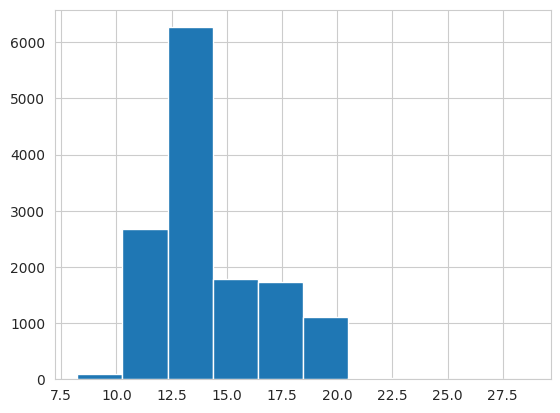

In [34]:
df_rutas_leche["est"].hist()

<Axes: >

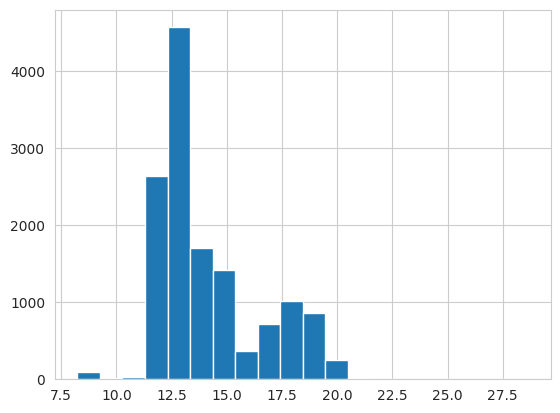

In [71]:
df_rutas_leche["est"].hist(bins = 20)

In [48]:
print(df_rutas_leche['tipoleche'].value_counts())

tipoleche
VACA              6760
CABRA             3999
OVEJA             2862
VACA DESNATADA      99
Name: count, dtype: int64


In [49]:
# --- Preparación del DataFrame ---
df_grafico = df_rutas_leche.copy()
df_grafico.head()

,codruta,peso,tipoleche,fecha,acidez,caseina,densidad,est,lactosa,mg,ph,prot,temp
fecha_index,,,,,,,,,,,,,
2010-12-16,1,25000,CABRA,16/12/2010,14.0,NaN,1.032,15.05,4.52,6.06,NaN,3.92,3.0
2010-12-18,1,25720,CABRA,18/12/2010,13.0,NaN,1.032,15.68,4.76,6.25,6.82,4.10,3.5
2010-12-19,1,25680,CABRA,19/12/2010,15.0,NaN,1.032,17.16,4.63,7.08,NaN,4.76,3.0
2011-01-03,1,25340,CABRA,01/03/2011,NaN,NaN,1.032,NaN,NaN,5.22,NaN,3.78,NaN
2011-09-16,1,24980,OVEJA,16/09/2011,22.0,4.42,1.035,19.25,4.59,7.15,6.75,5.52,3.0


In [50]:
df_grafico.dropna(subset=['est'], inplace=True)
df_grafico.head()

,codruta,peso,tipoleche,fecha,acidez,caseina,densidad,est,lactosa,mg,ph,prot,temp
fecha_index,,,,,,,,,,,,,
2010-12-16,1,25000,CABRA,16/12/2010,14.0,NaN,1.032,15.05,4.52,6.06,NaN,3.92,3.0
2010-12-18,1,25720,CABRA,18/12/2010,13.0,NaN,1.032,15.68,4.76,6.25,6.82,4.10,3.5
2010-12-19,1,25680,CABRA,19/12/2010,15.0,NaN,1.032,17.16,4.63,7.08,NaN,4.76,3.0
2011-09-16,1,24980,OVEJA,16/09/2011,22.0,4.42,1.035,19.25,4.59,7.15,6.75,5.52,3.0
2011-11-05,1,14440,OVEJA,11/05/2011,20.0,4.07,1.035,17.27,4.62,6.32,6.80,5.31,3.8


In [51]:
df_grafico = df_grafico.reset_index(drop=True)
df_grafico.head()

,codruta,peso,tipoleche,fecha,acidez,caseina,densidad,est,lactosa,mg,ph,prot,temp
0,1,25000,CABRA,16/12/2010,14.0,NaN,1.032,15.05,4.52,6.06,NaN,3.92,3.0
1,1,25720,CABRA,18/12/2010,13.0,NaN,1.032,15.68,4.76,6.25,6.82,4.10,3.5
2,1,25680,CABRA,19/12/2010,15.0,NaN,1.032,17.16,4.63,7.08,NaN,4.76,3.0
3,1,24980,OVEJA,16/09/2011,22.0,4.42,1.035,19.25,4.59,7.15,6.75,5.52,3.0
4,1,14440,OVEJA,11/05/2011,20.0,4.07,1.035,17.27,4.62,6.32,6.80,5.31,3.8


In [42]:
df_grafico.head()

,codruta,peso,tipoleche,fecha,acidez,caseina,densidad,est,lactosa,mg,ph,prot,temp
0,1,25000,CABRA,16/12/2010,14.0,NaN,1.032,15.05,4.52,6.06,NaN,3.92,3.0
1,1,25720,CABRA,18/12/2010,13.0,NaN,1.032,15.68,4.76,6.25,6.82,4.10,3.5
2,1,25680,CABRA,19/12/2010,15.0,NaN,1.032,17.16,4.63,7.08,NaN,4.76,3.0
3,1,24980,OVEJA,16/09/2011,22.0,4.42,1.035,19.25,4.59,7.15,6.75,5.52,3.0
4,1,14440,OVEJA,11/05/2011,20.0,4.07,1.035,17.27,4.62,6.32,6.80,5.31,3.8


In [ ]:
df

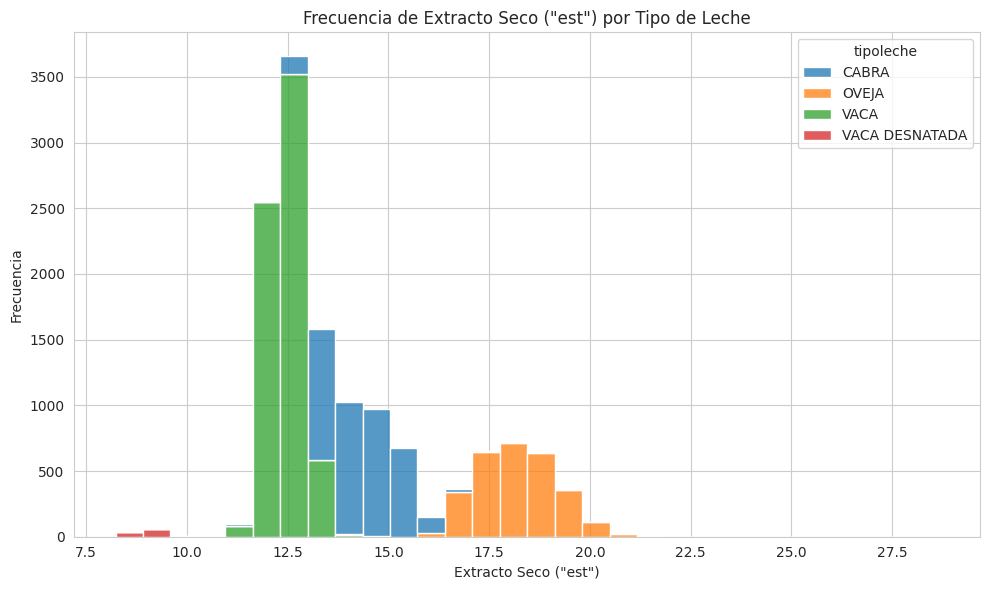

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_grafico,
    x='est',
    hue='tipoleche',
    bins=30,
    multiple='stack',     # ✅ evita solapamientos
    stat='count',         # ✅ frecuencia absoluta
    legend='auto'         # ✅ leyenda automática
)

plt.title('Frecuencia de Extracto Seco ("est") por Tipo de Leche')
plt.xlabel('Extracto Seco ("est")')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

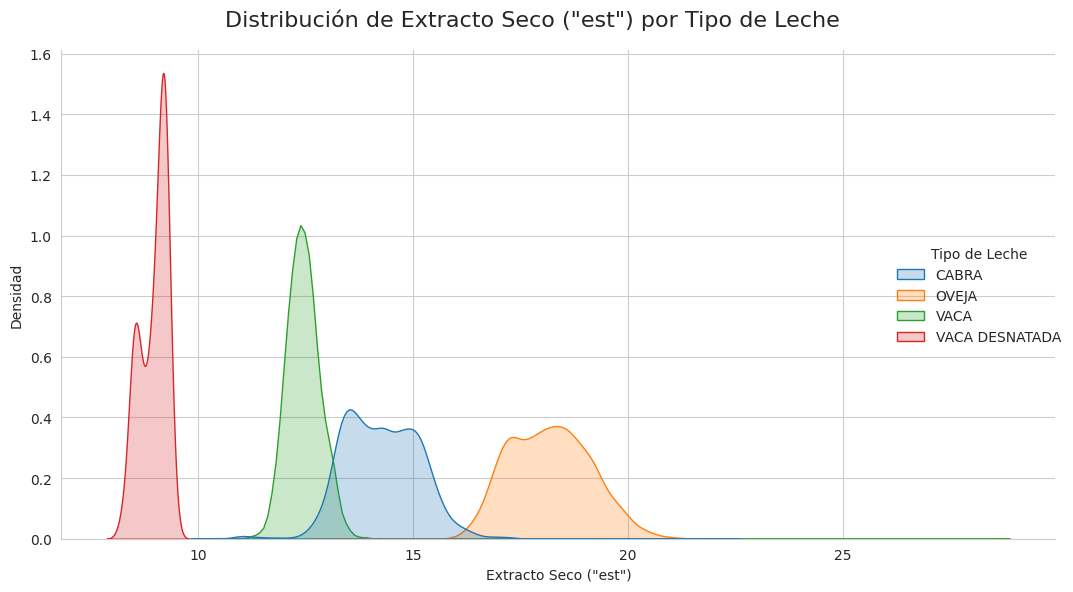

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Distribución por clase con histogramas y KDE ---
g = sns.displot(
    data=df_grafico,
    x='est',
    hue='tipoleche',
    kind='kde',         # curva de densidad
    fill=True,          # área bajo la curva
    common_norm=False,  # cada clase se normaliza por separado
    height=6,
    aspect=1.5
)

g.fig.suptitle('Distribución de Extracto Seco ("est") por Tipo de Leche', fontsize=16)
g.set_axis_labels('Extracto Seco ("est")', 'Densidad')
g.legend.set_title('Tipo de Leche')
plt.tight_layout()
plt.show()

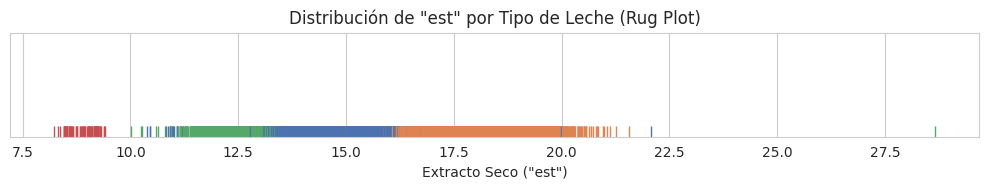

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))  # Altura baja para enfatizar el rug
sns.rugplot(
    data=df_grafico,
    x='est',
    hue='tipoleche',
    height=0.1,             # Altura de las marcas
    palette='deep',         # Colores por clase
    legend=False
)

plt.title('Distribución de "est" por Tipo de Leche (Rug Plot)')
plt.xlabel('Extracto Seco ("est")')
plt.yticks([])              # Oculta eje Y
plt.tight_layout()
plt.show()

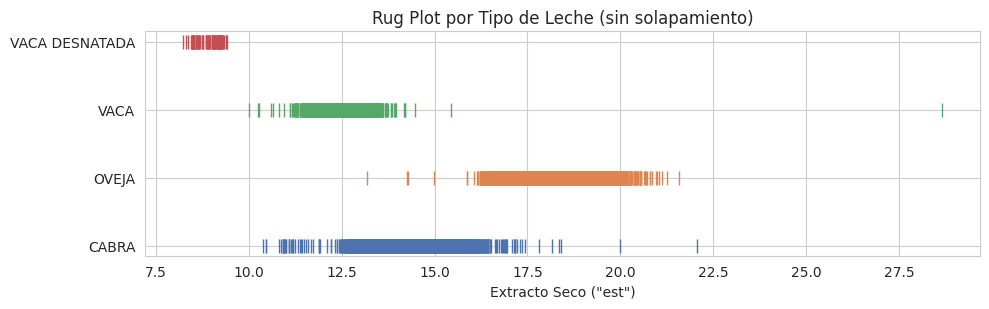

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preparar figura ---
fig, ax = plt.subplots(figsize=(10, 2 + 0.3 * df_grafico['tipoleche'].nunique()))

# --- Dibujar rug por clase ---
clases = df_grafico['tipoleche'].unique()
palette = sns.color_palette('deep', len(clases))

for i, clase in enumerate(clases):
    datos = df_grafico[df_grafico['tipoleche'] == clase]['est']
    y_pos = i  # Línea vertical para esta clase
    ax.plot(datos, [y_pos] * len(datos), '|', color=palette[i], markersize=10, label=clase)

# --- Ajustes visuales ---
ax.set_yticks(range(len(clases)))
ax.set_yticklabels(clases)
ax.set_xlabel('Extracto Seco ("est")')
ax.set_title('Rug Plot por Tipo de Leche (sin solapamiento)')
ax.legend().remove()  # ✅ Oculta leyenda si ya se muestran etiquetas en Y
plt.tight_layout()
plt.show()

vaca: recordar brazo de palanca, mostrar media filtrando ese valor

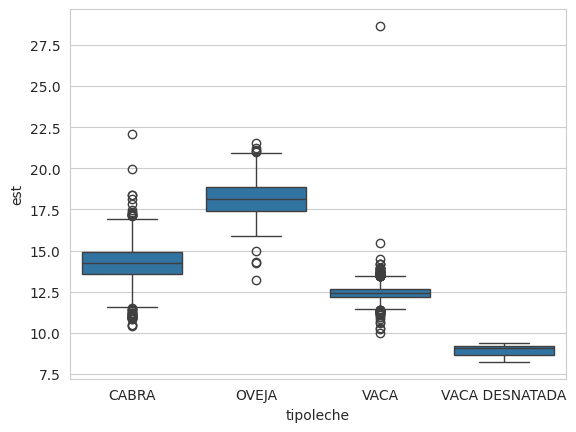

In [ ]:
sns.boxplot(
    data=df_grafico,
    x='tipoleche',
    y='est'
)
plt.show()

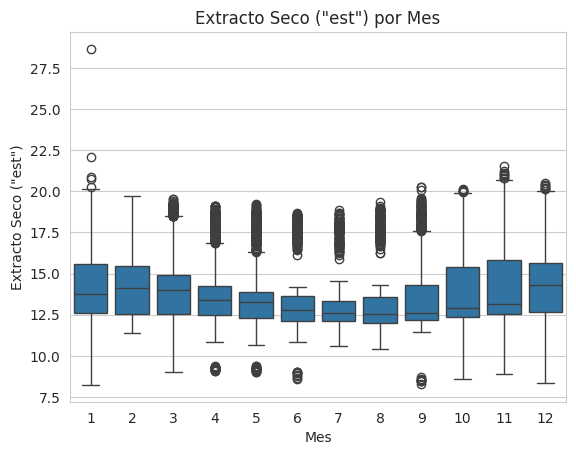

In [ ]:
# --- Preparación básica ---
df_grafico = df_rutas_leche.reset_index(drop=True)
df_grafico['mes'] = pd.to_datetime(df_grafico['fecha'], dayfirst=True).dt.month  # Número de mes
# O usa abreviaturas si prefieres:
# df_grafico['mes'] = pd.to_datetime(df_grafico['fecha'], dayfirst=True).dt.strftime('%b')  # 'Jan', 'Feb', etc.

# --- Boxplot por mes ---
sns.boxplot(data=df_grafico, x='mes', y='est')
plt.title('Extracto Seco ("est") por Mes')
plt.xlabel('Mes')
plt.ylabel('Extracto Seco ("est")')
plt.show()

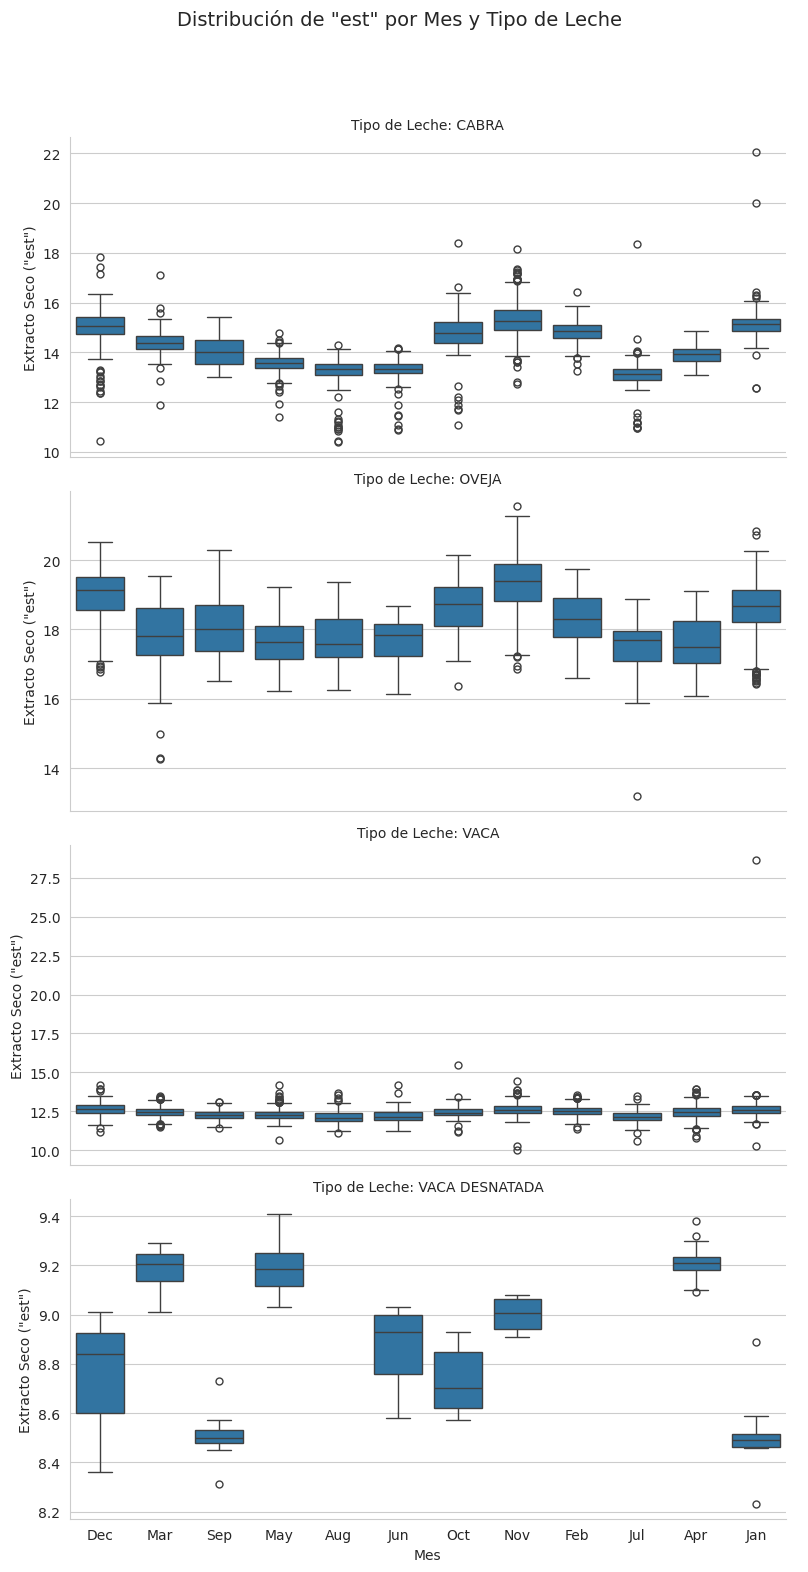

In [ ]:
df_simple = df_rutas_leche.reset_index(drop=True)
df_simple['mes'] = pd.to_datetime(df_simple['fecha'], dayfirst=True).dt.strftime('%b')  # Mes abreviado

# --- Boxplots separados por tipo de leche ---
g = sns.catplot(
    data=df_simple,
    x='mes',
    y='est',
    kind='box',
    row='tipoleche',
    height=4,
    aspect=2,
    sharey=False  # 🔑 Cada tipo de leche con su propia escala Y
)

g.set_titles(row_template='Tipo de Leche: {row_name}')
g.set_axis_labels('Mes', 'Extracto Seco ("est")')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de "est" por Mes y Tipo de Leche', fontsize=14)
plt.show()


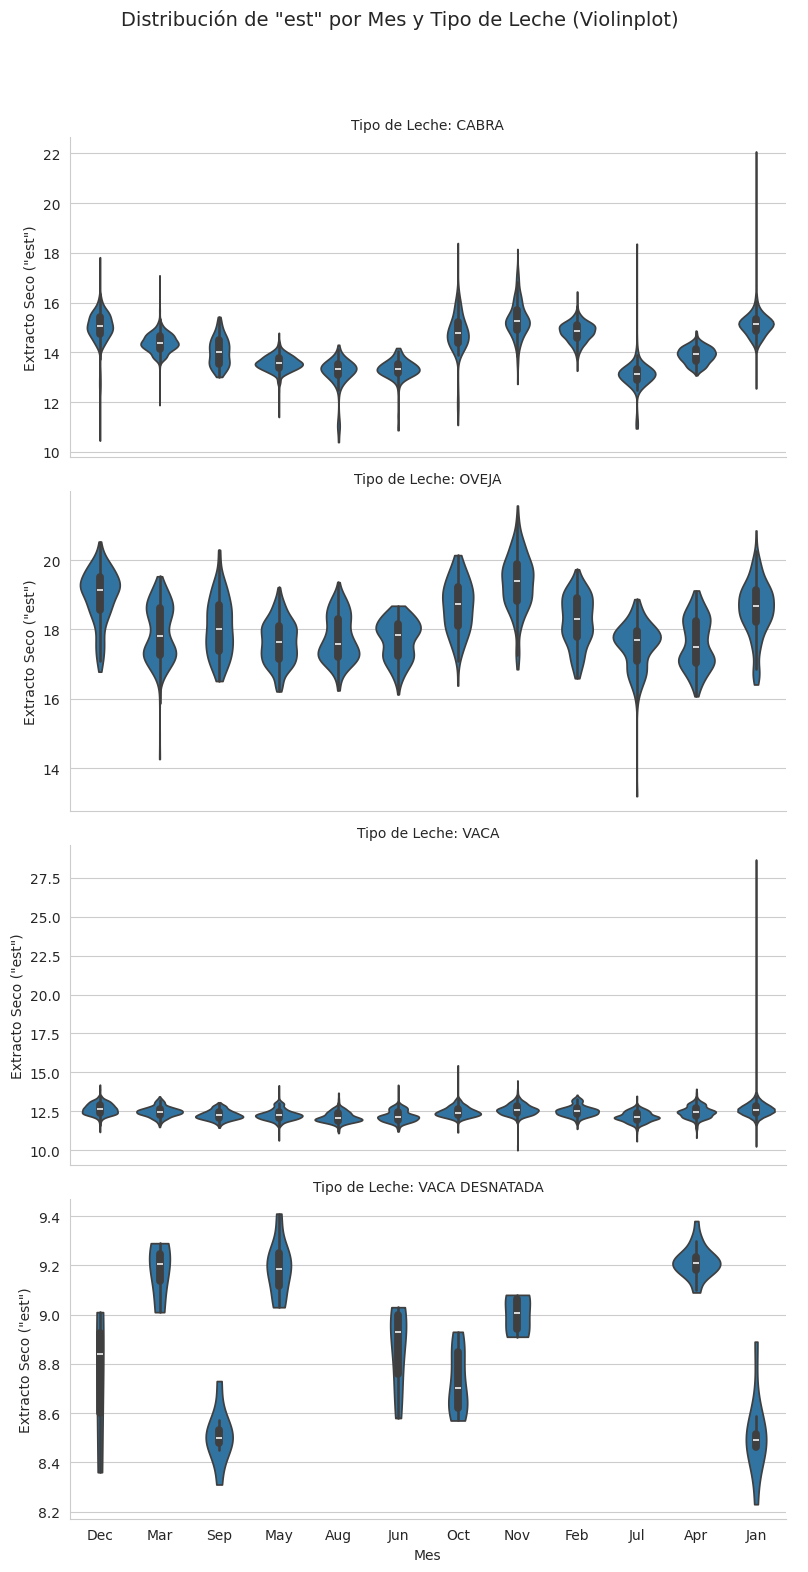

In [ ]:
df_simple = df_rutas_leche.reset_index(drop=True)
df_simple['mes'] = pd.to_datetime(df_simple['fecha'], dayfirst=True).dt.strftime('%b')  # Abreviatura de mes

# --- Violinplots separados por tipo de leche ---
g = sns.catplot(
    data=df_simple,
    x='mes',
    y='est',
    kind='violin',
    row='tipoleche',
    height=4,
    aspect=2,
    sharey=False,  # 🔑 Escala independiente por tipo de leche
    inner='box',   # Añade boxplot dentro del violín
    cut=0          # Evita que se extienda más allá de los datos
)

g.set_titles(row_template='Tipo de Leche: {row_name}')
g.set_axis_labels('Mes', 'Extracto Seco ("est")')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de "est" por Mes y Tipo de Leche (Violinplot)', fontsize=14)
plt.show()


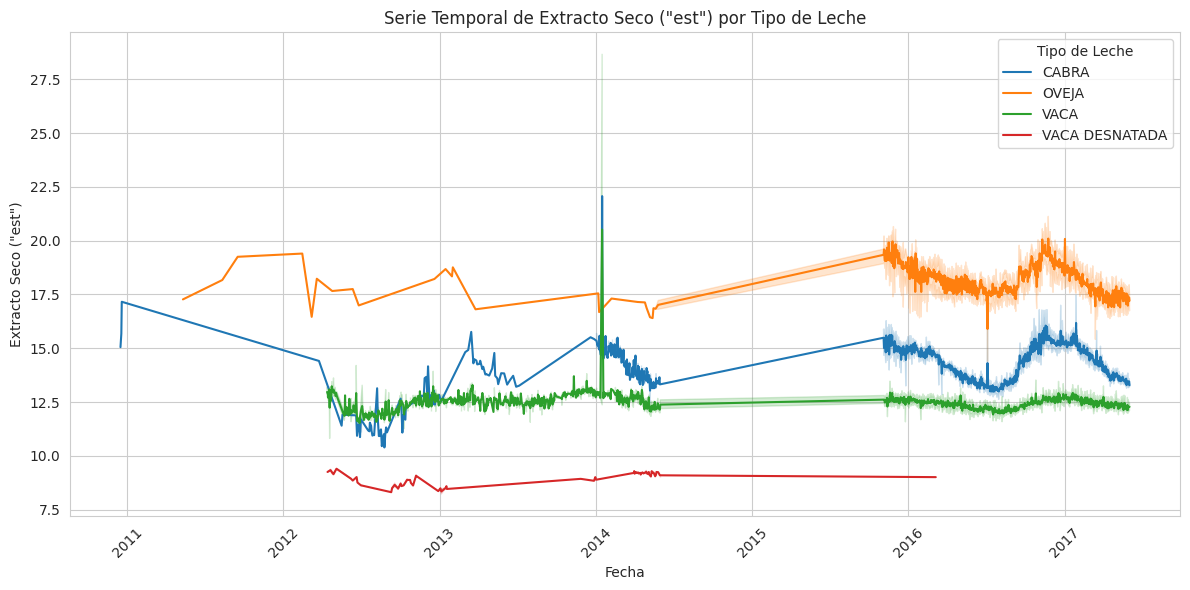

In [ ]:
# --- Asegurarse de que 'fecha' esté en formato datetime ---
df_series = df_rutas_leche.reset_index(drop=True)
df_series['fecha'] = pd.to_datetime(df_series['fecha'], dayfirst=True)

# --- Gráfico de líneas por tipo de leche ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_series,
    x='fecha',
    y='est',
    hue='tipoleche'
)

plt.title('Serie Temporal de Extracto Seco ("est") por Tipo de Leche')
plt.xlabel('Fecha')
plt.ylabel('Extracto Seco ("est")')
plt.legend(title='Tipo de Leche')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



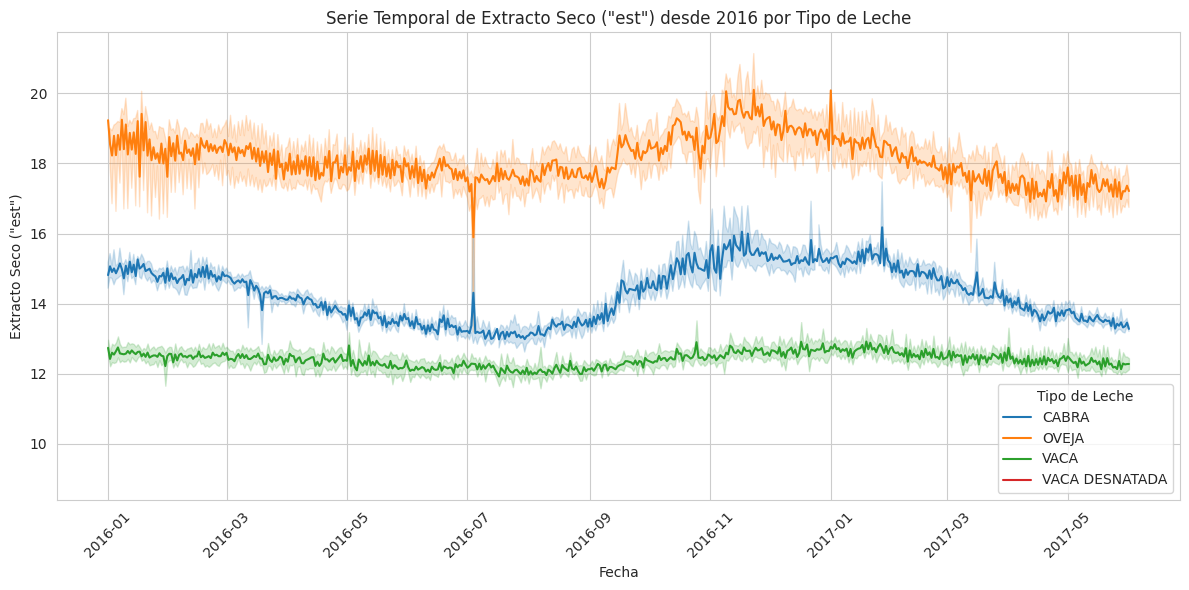

In [ ]:
df_filtrado = df_rutas_leche.reset_index(drop=True)
df_filtrado['fecha'] = pd.to_datetime(df_filtrado['fecha'], dayfirst=True)

# --- Filtrar a partir de 2016 ---
df_2016 = df_filtrado[df_filtrado['fecha'] >= '2016-01-01']

# --- Gráfico de líneas ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_2016,
    x='fecha',
    y='est',
    hue='tipoleche'
)

plt.title('Serie Temporal de Extracto Seco ("est") desde 2016 por Tipo de Leche')
plt.xlabel('Fecha')
plt.ylabel('Extracto Seco ("est")')
plt.legend(title='Tipo de Leche')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


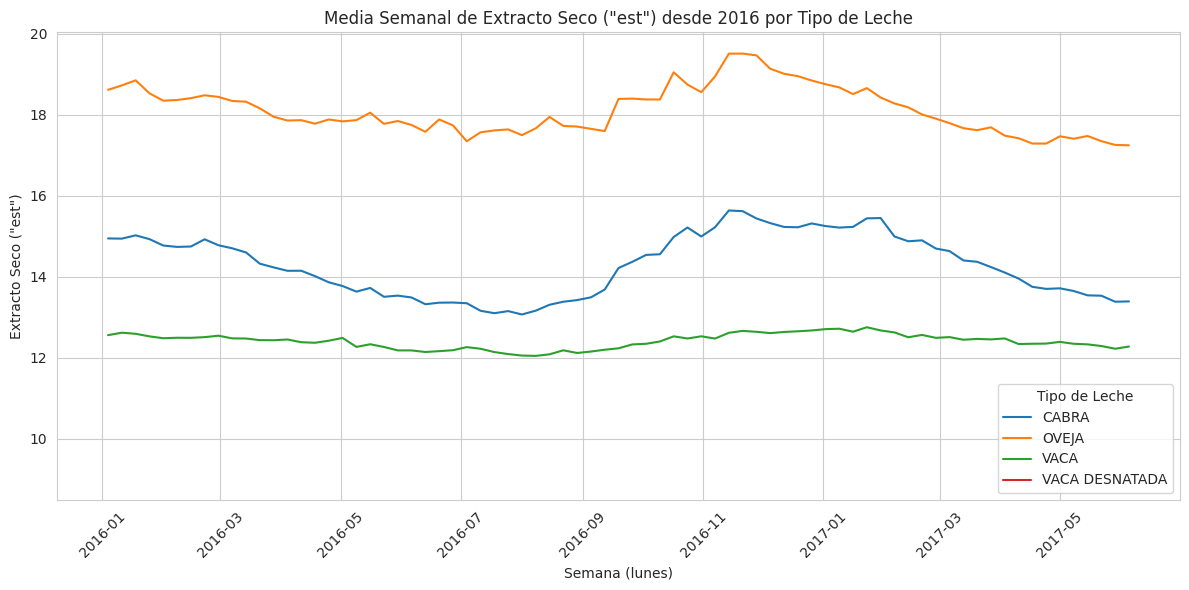

In [ ]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
df_resample = df_rutas_leche.copy()
df_resample['fecha'] = pd.to_datetime(df_resample['fecha'], dayfirst=True)
df_resample = df_resample[df_resample['fecha'] >= '2016-01-01']
df_resample.set_index('fecha', inplace=True)

# --- Agrupación semanal por tipo de leche ---
df_semanal = (
    df_resample
    .groupby('tipoleche', observed=True)
    .resample('W-MON')  # Semanas que comienzan en lunes
    ['est']
    .mean()
    .reset_index()
)

# --- Gráfico de líneas ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_semanal,
    x='fecha',
    y='est',
    hue='tipoleche'
)

plt.title('Media Semanal de Extracto Seco ("est") desde 2016 por Tipo de Leche')
plt.xlabel('Semana (lunes)')
plt.ylabel('Extracto Seco ("est")')
plt.legend(title='Tipo de Leche')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


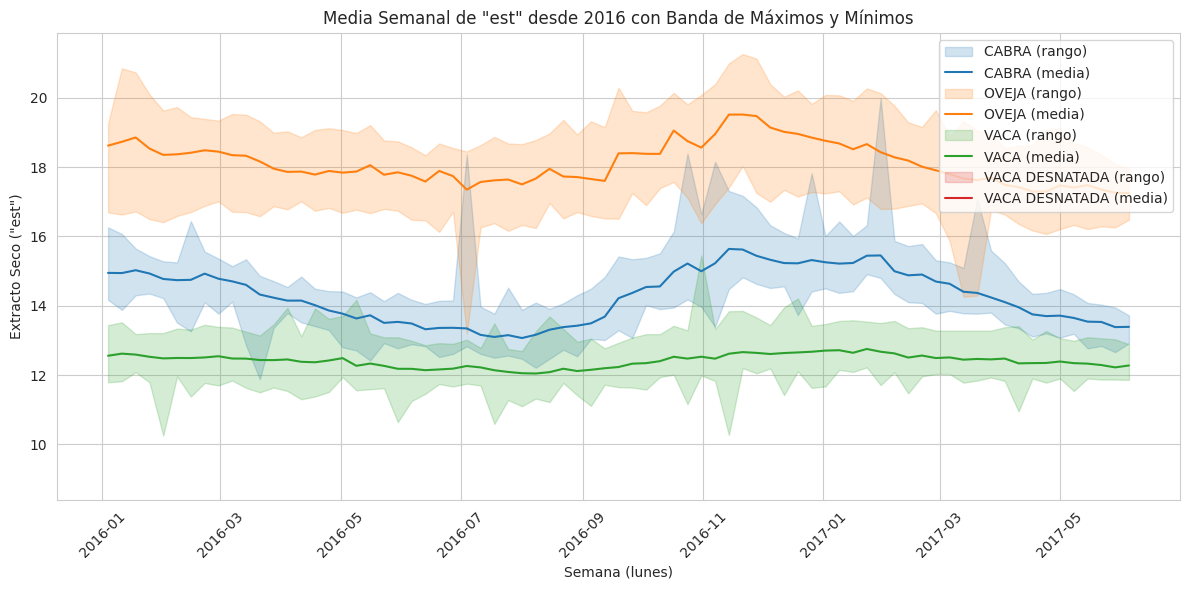

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Preparación del DataFrame ---
df = df_rutas_leche.copy()
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)
df = df[df['fecha'] >= '2016-01-01']
df.set_index('fecha', inplace=True)

# --- Cálculo de media, min y max por semana y tipo de leche ---
df_stats = (
    df
    .groupby('tipoleche', observed=True)
    .resample('W-MON')
    ['est']
    .agg(['mean', 'min', 'max'])
    .reset_index()
)

# --- Gráfico con banda de min-max ---
plt.figure(figsize=(12, 6))

# Colores base de Seaborn
palette = sns.color_palette()

# Dibujar por cada tipo de leche
for i, tipo in enumerate(df_stats['tipoleche'].unique()):
    df_tipo = df_stats[df_stats['tipoleche'] == tipo]

    # Banda entre min y max
    plt.fill_between(
        df_tipo['fecha'],
        df_tipo['min'],
        df_tipo['max'],
        color=palette[i],
        alpha=0.2,
        label=f'{tipo} (rango)'
    )

    # Línea de la media
    plt.plot(
        df_tipo['fecha'],
        df_tipo['mean'],
        color=palette[i],
        label=f'{tipo} (media)'
    )

plt.title('Media Semanal de "est" desde 2016 con Banda de Máximos y Mínimos')
plt.xlabel('Semana (lunes)')
plt.ylabel('Extracto Seco ("est")')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()